# XGBoost (Extreme Gradient Boosting)

Xgboost is a machine learning library that implements the gradient boosting trees concept. It's designed to be quite fast compared to the implementation available in sklearn. Xgboost lets us handle a large amount of data that can have samples in billions with ease. It can run in parallel and distributed environments to speed up the training process. The distributed algorithm can be useful if data does not fit into to main memory of the machine. Currently, it has support for dask to run the algorithm in a distributed environment. Xgboost even supports running an algorithm on GPU with simple configuration which will complete quite fast compared to when run on CPU. Xgboost provides API in C, C++, Python, R, Java, Julia, Ruby, and Swift. Xgboost code can be run on a distributed environment like AWS YARN, Hadoop, etc. It even provides an interface to run the algorithm from the command line/shell. Apart from this, xgboost provides support for controlling feature interactions, custom evaluation functions, callbacks during training, monotonic constraints, etc. As a part of this tutorial, we'll explain the API of xgboost and its various features through different examples. We'll try to cover the majority of features available from xgboost to make this tutorial a short reference to master xgboost API.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 50)

import xgboost as xgb
import sklearn

print("XGB Version          : ", xgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)

XGB Version          :  1.3.2
Scikit-Learn Version :  0.24.1


<IPython.core.display.Javascript object>

## Load Datasets

We’ll be using the below-mentioned three different datasets which are available from sklearn as a part of this tutorial for explanation purposes.

- Boston Housing Dataset: It's a regression problem dataset which has information about a various attribute of houses in Boston and their price in dollar. This will be used for regression tasks.
- Breast Cancer Dataset: It's a classification dataset which has information about two different types of tumor. It'll be used for explaining binary classification tasks.
- Wine Dataset - It's a classification dataset which has information about ingredients used in three different types of wines. It'll be used for explaining multi-class classification tasks.

We have loaded all three datasets mentioned one by one below. We are printing descriptions of datasets which gives us an overview of dataset features and size. We have even loaded each dataset as a pandas data frame and displayed the first few samples of data.

### Boston Housing Dataset

In [3]:
from sklearn.datasets import load_boston

boston = load_boston()

for line in boston.DESCR.split("\n")[5:29]:
    print(line)

boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df["Price"] = boston.target

boston_df.head()

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>

### Breast Cancer Dataset

In [4]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

for line in breast_cancer.DESCR.split("\n")[5:31]:
    print(line)

breast_cancer_df = pd.DataFrame(
    data=breast_cancer.data, columns=breast_cancer.feature_names
)
breast_cancer_df["TumorType"] = breast_cancer.target

breast_cancer_df.head()

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Radius SE, field 20 is Worst Radius.

        - class:
                - WDBC-Malignant
       

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,TumorType
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<IPython.core.display.Javascript object>

### Wine Dataset

In [5]:
from sklearn.datasets import load_wine

wine = load_wine()

for line in wine.DESCR.split("\n")[5:29]:
    print(line)

wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df["WineType"] = wine.target

wine_df.head()

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,WineType
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<IPython.core.display.Javascript object>

## Booster: Regression

We'll start with the creation of a simple estimator for the regression task of predicting prices of houses in Boston. We'll explain how we can use API to create an estimator with default parameters which will just work fine. We'll then explain various parameters available for a different purpose.

We'll first divide Boston dataset into train (90%) and test (10%) datasets using sklearn's function train_test_split().

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((455, 13), (51, 13), (455,), (51,))

<IPython.core.display.Javascript object>

Xgboost default API only accepts a dataset that is wrapped in DMatrix. DMatrix is an internal data structure of xgboost which wraps data features and labels both into it. It's designed to be efficient and fastens the training process.

### DMatrix()

We can create a DMatrix instance by setting a list of the below parameters. Only the data parameter is required and all others are optional.

- data - This parameter accepts one of the below as input which has values for data features.
 - pandas dataframe
 - numpy array
 - scipy sparse matrix
 - path to libsvm format text file
 - libsvm format text
- label - It accepts a numpy array of pandas data frame containing labels of the dataset.
- missing - It accepts float value in the dataset which should be treated as a float value. The default is None mean np.nan is considered missing.
- feature_names - It accepts a list of string specifying feature names of data.
- feature_types - It accepts a list of string specifying feature data types.
- nthread - It accepts integer specifying the number of threads to use when loading data. The value of -1 uses all available threads on the system.

In [11]:
dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=boston.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=boston.feature_names)

dmat_test, dmat_train

(<xgboost.core.DMatrix at 0x7fea456b62b0>,
 <xgboost.core.DMatrix at 0x7fea456b67f0>)

<IPython.core.display.Javascript object>

The simplest way of creating a booster using xgboost is by calling the train() method of xgboost. The train() method returns an instance of class xgboost.core.Booster after training is completed. We need to pass parameters for boosting algorithm as a dictionary to train method.

### train()

Below we have given a list of important parameters of the train() method. Only params and dtrain are required and all other parameters are optional and have default values set to them.

- params - It accepts a dictionary of gradient boosting algorithm parameters. We can give it an even empty dictionary and it'll take the default value for all parameters. By default, it'll consider the task to be a regression task and will calculate RMSE loss. We need to specify at least an objective function if we want it to consider a classification task for the data.

- dtrain - It accepts DMatrix instances of train data.

- num_boost_round - It accepts integer specifying the number of rounds of the training process. The algorithm will iterate over whole training data that many times.

- evals - We can provide a list of tuples specifying datasets to be used for evaluation when performing training. We have passed our train and test datasets as evaluation sets hence RMSE for each will be printed after all iterations.

- obj - We can give customized objective function which will be maximized/minimized when training algorithm.

- feval - We can give a customized evaluation function which will be used to evaluate datasets given to evals.

- maximize - It accepts a boolean specifying whether to maximize or minimize our objective/loss function.

- early_stopping_rounds - It accepts an integer which instructs the algorithm to stop training if the last eval set in the list has not improved for that many rounds. If the objective/loss of the last eval dataset has not improved for that many consecutive rounds of training then the training process will stop. This parameter requires us to provide an evals parameter for it to work.

- evals_result - We can provide an empty dictionary to this parameter and it'll store evaluation results into it.

- verbose_eval - It accepts bool or integer specifying whether to print evaluation results. The integer value greater than 0 will print evaluation results at every that many iterations.

- callbacks - It accepts a list of callbacks that are applied at the end of each iteration of the training process.

Below we have called the train() method of xgboost by passing it a few parameters for boosting algorithm, train data for training, and evaluation set of training and test dataset on which evaluation after each iteration will happen.

In [12]:
booster = xgb.train(
    {"max_depth": 3, "eta": 1, "objective": "reg:squarederror"},
    dmat_train,
    evals=[(dmat_train, "train"), (dmat_test, "test")],
)

booster

[0]	train-rmse:3.94894	test-rmse:3.59159
[1]	train-rmse:3.37195	test-rmse:3.26373
[2]	train-rmse:3.09769	test-rmse:3.12218
[3]	train-rmse:2.78200	test-rmse:2.94107
[4]	train-rmse:2.53499	test-rmse:2.75222
[5]	train-rmse:2.37140	test-rmse:2.78515
[6]	train-rmse:2.23286	test-rmse:2.64519
[7]	train-rmse:2.16047	test-rmse:2.64290
[8]	train-rmse:2.03129	test-rmse:2.58895
[9]	train-rmse:1.96511	test-rmse:2.61442


<IPython.core.display.Javascript object>

We can use the predict() method of booster instance to predict labels for data passed to it. The predict() method requires us to pass the DMatrix instance only.

### predict()

The predict method provides a list of the below important parameters that can be useful in a different situation.

- data - It accepts DMatrix of feature values.

- ntree_limit - It accepts integer specifying the number of trees to use from the total tree to make a prediction. The default is 0 which means to use all trees.

- pred_leaf - It accepts boolean which is set to True returns array of size n_samples x n_trees where each entry is an index of leaf in a tree which was used for prediction. The entry (0,1) refers to an index of leaf for the 2nd tree which was used to make a prediction for the first sample. The default is False.

- pred_contribs - It accepts boolean which if set to True returns an array of size n_sample x n_features+1 where each entry specifies contributions of features in making a final prediction for that sample. It's referred to as SHAP values. If we add all values for a particular sample then we can get the actual prediction. The default is False.

- pred_interactions - It accepts boolean which if set to True returns array of size n_sample x n_features+1 xn_features+1 indicating features SHAP interaction values for each sample.

Below we have created a data frame showing the first 10 actual test labels and 10 predicted labels for test data.

In [13]:
pd.DataFrame({"Actuals": Y_test[:10], "Prediction": booster.predict(dmat_test)[:10]})

,Actuals,Prediction
0,23.6,25.580267
1,32.4,31.743393
2,13.6,13.508162
3,22.8,23.470869
4,16.1,13.658171
5,20.0,22.350372
6,17.8,17.217281
7,14.0,14.332675
8,19.6,20.501831
9,16.8,20.756474


<IPython.core.display.Javascript object>

In [15]:
shap_values = booster.predict(dmat_test, pred_contribs=True)

print("SHAP Values Size : ", shap_values.shape)

print("\nSample SHAP Values : ", shap_values[0])
print("\nSumming SHAP Values for Prediction : ", shap_values.sum(axis=1)[:5])

SHAP Values Size :  (51, 14)

Sample SHAP Values :  [ 5.31424880e-01  0.00000000e+00  3.62157822e-04  1.90089308e-02
  1.01445103e+00 -2.51514196e+00 -5.74439168e-01  2.83589065e-01
  4.30885423e-03 -2.59072632e-01  3.69396627e-01  1.22908555e-01
  3.89043856e+00  2.26930332e+01]

Summing SHAP Values for Prediction :  [25.580269 31.743395 13.508162 23.470871 13.658173]


<IPython.core.display.Javascript object>

In [16]:
booster.predict(dmat_test, pred_leaf=True)[:5]

array([[ 8, 11, 11, 13, 11,  8, 11,  5,  9, 13],
       [ 8,  7, 11,  8, 12,  8,  8,  5,  7, 13],
       [13, 11, 11, 12,  7, 13, 11,  6, 13, 11],
       [ 8, 11, 11, 13,  7, 12,  8,  5,  7, 13],
       [14, 11, 11, 14, 11, 13, 11,  5, 13, 14]], dtype=int32)

<IPython.core.display.Javascript object>

In [17]:
shap_interactions = booster.predict(dmat_test, pred_interactions=True)

print("SHAP Interactions Size : ", shap_interactions.shape)

SHAP Interactions Size :  (51, 14, 14)


<IPython.core.display.Javascript object>

In [18]:
print("Train RMSE : ", booster.eval(dmat_train))
print("Test  RMSE : ", booster.eval(dmat_test))

Train RMSE :  [0]	eval-rmse:1.965108
Test  RMSE :  [0]	eval-rmse:2.614419


<IPython.core.display.Javascript object>

In [19]:
from sklearn.metrics import r2_score

print("Test  R2 Score : %.2f" % r2_score(Y_test, booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, booster.predict(dmat_train)))

Test  R2 Score : 0.89
Train R2 Score : 0.96


<IPython.core.display.Javascript object>

In [21]:
print("Number of Trees in Ensemble : ", booster.best_ntree_limit)

print(
    "\nTest  R2 Score : %.2f"
    % r2_score(Y_test, booster.predict(dmat_test, ntree_limit=5))
)

print(
    "Train R2 Score : %.2f"
    % r2_score(Y_train, booster.predict(dmat_train, ntree_limit=5))
)

Number of Trees in Ensemble :  10

Test  R2 Score : 0.88
Train R2 Score : 0.93


<IPython.core.display.Javascript object>

### plot_importance()

The xgboost provides functionality that lets us print feature importance. We need to pass our booster instance to the method and it'll plot feature importance bar chart using matplotlib. The plot_importance() method has an important parameter named importance_type which accepts one of the below mentioned 3 string values to plot feature importance in three different ways.

- weight - It plots the number of times a feature appears in a tree. This is the default value.
- gain - It plots the average gain of splits that uses the feature.
- cover - It plots the average coverage of splits for each feature.

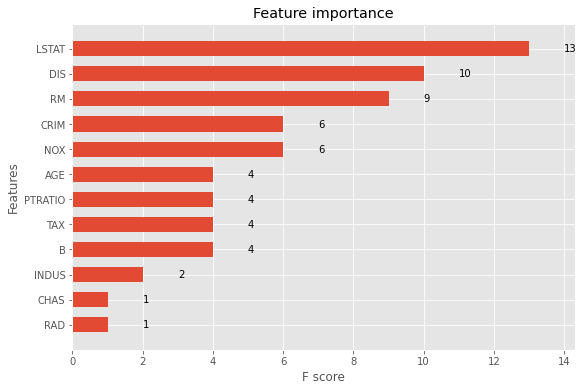

<IPython.core.display.Javascript object>

In [22]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_importance(booster, ax=ax, height=0.6, importance_type="weight")

### plot_tree()
Xgboost also lets us plot the individual trees in the ensemble of trees using the plot_tree() method. It accepts booster instance and index of a tree which we want to plot. Below we have plotted the 10th tree of an ensemble. Please make a note that indexing starts at 0.

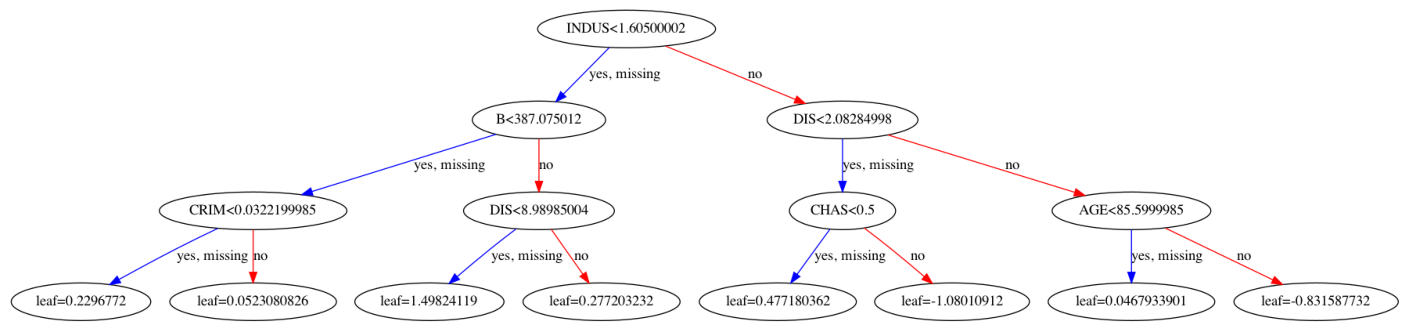

<IPython.core.display.Javascript object>

In [23]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(25, 10))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_tree(booster, ax=ax, num_trees=9)

### trees_to_dataframe()
The trees_to_dataframe() method will dump information on trees used in an ensemble as a pandas dataframe. It'll have information on each tree-like individual node ids, feature name, and its values used for a split at each node, gain at each node, cover at each node, etc.

In [24]:
booster.trees_to_dataframe()

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,LSTAT,9.72500,0-1,0-2,0-1,16866.609400,455.0
1,0,1,0-1,RM,6.94100,0-3,0-4,0-3,6006.859380,196.0
2,0,2,0-2,LSTAT,16.21500,0-5,0-6,0-5,2317.007810,259.0
3,0,3,0-3,DIS,1.48495,0-7,0-8,0-7,562.812500,129.0
4,0,4,0-4,RM,7.43700,0-9,0-10,0-9,496.929688,67.0
...,...,...,...,...,...,...,...,...,...,...
133,9,10,9-10,Leaf,NaN,NaN,NaN,NaN,0.277203,2.0
134,9,11,9-11,Leaf,NaN,NaN,NaN,NaN,0.477180,104.0
135,9,12,9-12,Leaf,NaN,NaN,NaN,NaN,-1.080109,11.0
136,9,13,9-13,Leaf,NaN,NaN,NaN,NaN,0.046793,249.0


<IPython.core.display.Javascript object>

## Booster: Tweedie Regression

Below we have explained an example of how we can use tweedie regression on Boston housing data. We have trained the model using tweedie regression and then evaluated RMSE and R2 scores on both train and test datasets.

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=boston.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=boston.feature_names)

tweedie_booster = xgb.train(
    {
        "max_depth": 3,
        "eta": 1,
        "objective": "reg:tweedie",
        "tree_method": "hist",
        "nthread": 4,
    },
    dmat_train,
    evals=[(dmat_train, "train"), (dmat_test, "test")],
)

print("\nTrain RMSE : ", tweedie_booster.eval(dmat_train))
print("Test  RMSE : ", tweedie_booster.eval(dmat_test))

from sklearn.metrics import r2_score

print("\nTest  R2 Score : %.2f" % r2_score(Y_test, tweedie_booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, tweedie_booster.predict(dmat_train)))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

[0]	train-tweedie-nloglik@1.5:28.32970	test-tweedie-nloglik@1.5:26.66488
[1]	train-tweedie-nloglik@1.5:19.30740	test-tweedie-nloglik@1.5:18.58394
[2]	train-tweedie-nloglik@1.5:18.72894	test-tweedie-nloglik@1.5:18.14010
[3]	train-tweedie-nloglik@1.5:18.71593	test-tweedie-nloglik@1.5:18.13066
[4]	train-tweedie-nloglik@1.5:18.70913	test-tweedie-nloglik@1.5:18.12305
[5]	train-tweedie-nloglik@1.5:18.70438	test-tweedie-nloglik@1.5:18.12354
[6]	train-tweedie-nloglik@1.5:18.70052	test-tweedie-nloglik@1.5:18.11985
[7]	train-tweedie-nloglik@1.5:18.69816	test-tweedie-nloglik@1.5:18.12131
[8]	train-tweedie-nloglik@1.5:18.69564	test-tweedie-nloglik@1.5:18.12422
[9]	train-tweedie-nloglik@1.5:18.69303	test-tweedie-nloglik@1.5:18.12833

Train RMSE :  [0]	eval-tweedie-nloglik@1.5:18.693033
Test  RMSE :  [0]	eval-tweedie-nloglik@1.5:18.128323

Test  R2 Score : 0.90
Train R2 Score : 0.95


<IPython.core.display.Javascript object>

## Booster: Binary Classification 
As a part of this section, we have explained how we can use the train() method to train booster for the binary classification task of classifying breast cancer tumor type. Please make a note that we have used binary:logistic as our objective function hence the output of the predict() method of the booster will be a probability. We have included logic to convert probabilities into class. We have then calculated accuracy, confusion matrix, and classification report for test data.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    train_size=0.90,
    stratify=breast_cancer.target,
    random_state=42,
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=breast_cancer.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=breast_cancer.feature_names)


# {"max_depth": 2, "eta": 1, "objective": "binary:logistic"}
booster = xgb.train(
    {"max_depth": 2, "eta": 1, "objective": "binary:logistic"},
    dmat_train,
    evals=[(dmat_train, "train"), (dmat_test, "test")],
)

print("\nTrain RMSE : ", booster.eval(dmat_train))
print("Test  RMSE : ", booster.eval(dmat_test))


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train_preds = [1 if pred > 0.5 else 0 for pred in booster.predict(data=dmat_train)]
test_preds = [1 if pred > 0.5 else 0 for pred in booster.predict(data=dmat_test)]

print("\nTest  Accuracy : %.2f" % accuracy_score(Y_test, test_preds))
print("Train Accuracy : %.2f" % accuracy_score(Y_train, train_preds))

print("\nConfusion Matrix : ")
print(confusion_matrix(Y_test, test_preds))

print("\nClassification Report : ")
print(classification_report(Y_test, test_preds))

Train/Test Sizes :  (512, 30) (57, 30) (512,) (57,) 

[22:29:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-logloss:0.21590	test-logloss:0.26491
[1]	train-logloss:0.12403	test-logloss:0.18752
[2]	train-logloss:0.08709	test-logloss:0.18044
[3]	train-logloss:0.06506	test-logloss:0.13185
[4]	train-logloss:0.04643	test-logloss:0.12292
[5]	train-logloss:0.03771	test-logloss:0.12396
[6]	train-logloss:0.03046	test-logloss:0.12586
[7]	train-logloss:0.02303	test-logloss:0.11204
[8]	train-logloss:0.01955	test-logloss:0.11809
[9]	train-logloss:0.01639	test-logloss:0.11828

Train RMSE :  [0]	eval-logloss:0.016394
Test  RMSE :  [0]	eval-logloss:0.118281

Test  Accuracy : 0.96
Train Accuracy : 1.00

Confusion Matrix : 
[[20  1]
 [ 1 35]]

Classification Report : 
  

<IPython.core.display.Javascript object>

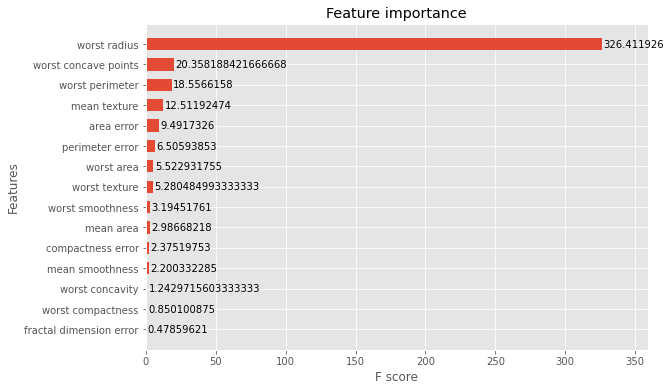

<IPython.core.display.Javascript object>

In [28]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_importance(booster, ax=ax, height=0.6, importance_type="gain")

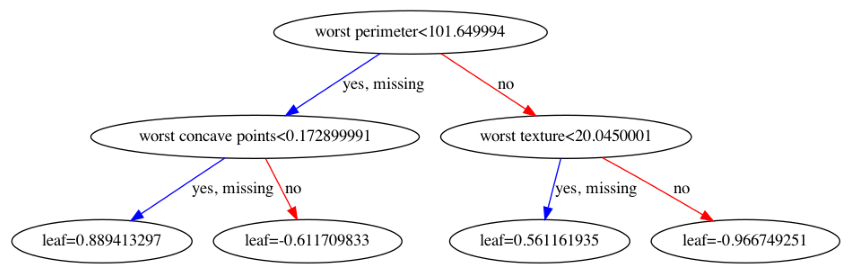

<IPython.core.display.Javascript object>

In [32]:
# We have now plotted 3rd tree from the ensemble below
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_tree(booster, ax=ax, num_trees=2)

## Booster: Multi-Class Classification 
As a part of this section, we have explained how we can use the train() method for multi-class classification problems. We have used it to generate booster trained on wine classification train dataset. We have then evaluated the accuracy, confusion matrix, and classification report on the test dataset.

We have then plotted the feature importance bar chart and first decision tree.

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(
    wine.data, wine.target, train_size=0.80, stratify=wine.target, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=wine.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=wine.feature_names)


# "max_depth": 5, "eta": 1, "objective": "multi:softmax", "num_class": 3
booster = xgb.train(
    {"max_depth": 5, "eta": 1, "objective": "multi:softmax", "num_class": 3},
    dmat_train,
    evals=[(dmat_train, "train"), (dmat_test, "test")],
)

print("\nTrain RMSE : ", booster.eval(dmat_train))
print("Test  RMSE : ", booster.eval(dmat_test))


from sklearn.metrics import accuracy_score

print(
    "\nTest  Accuracy : %.2f" % accuracy_score(Y_test, booster.predict(data=dmat_test))
)
print(
    "Train Accuracy : %.2f" % accuracy_score(Y_train, booster.predict(data=dmat_train))
)

print("\nConfusion Matrix : ")
print(confusion_matrix(Y_test, booster.predict(data=dmat_test)))

print("\nClassification Report : ")
print(classification_report(Y_test, booster.predict(data=dmat_test)))

Train/Test Sizes :  (142, 13) (36, 13) (142,) (36,) 

[22:32:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:0.25512	test-mlogloss:0.32637
[1]	train-mlogloss:0.10468	test-mlogloss:0.17816
[2]	train-mlogloss:0.05119	test-mlogloss:0.10644
[3]	train-mlogloss:0.02820	test-mlogloss:0.07878
[4]	train-mlogloss:0.01885	test-mlogloss:0.05759
[5]	train-mlogloss:0.01396	test-mlogloss:0.06325
[6]	train-mlogloss:0.01149	test-mlogloss:0.05437
[7]	train-mlogloss:0.01036	test-mlogloss:0.05812
[8]	train-mlogloss:0.00991	test-mlogloss:0.05858
[9]	train-mlogloss:0.00955	test-mlogloss:0.06127

Train RMSE :  [0]	eval-mlogloss:0.009555
Test  RMSE :  [0]	eval-mlogloss:0.061267

Test  Accuracy : 0.97
Train Accuracy : 1.00

Confusion Matrix : 
[[12  0  0]
 [ 0 14  0]
 

<IPython.core.display.Javascript object>

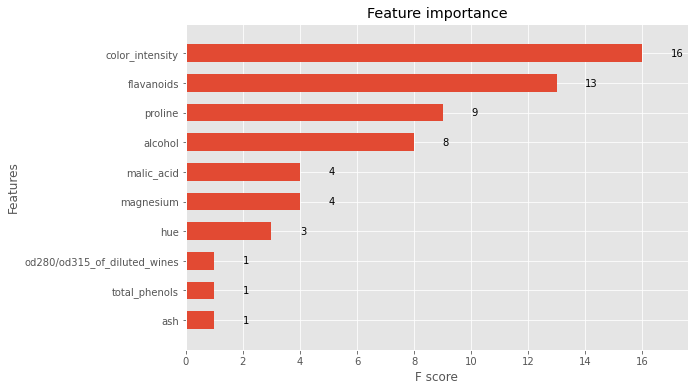

<IPython.core.display.Javascript object>

In [34]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(9, 6))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_importance(booster, ax=ax, height=0.6, importance_type="weight")

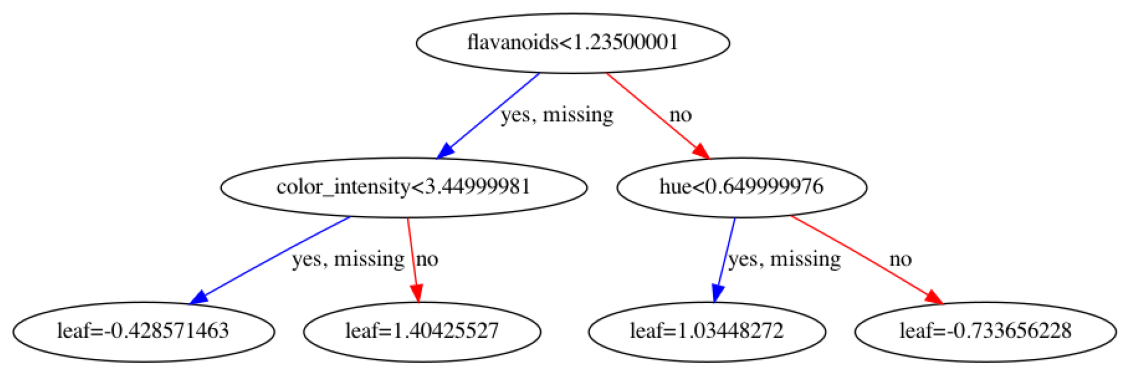

<IPython.core.display.Javascript object>

In [38]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(111)
    xgb.plotting.plot_tree(booster, ax=ax, num_trees=2)

## Saving and Loading Trained Model

In [39]:
# Save the model
booster.save_model("multiclass_classification.model")

<IPython.core.display.Javascript object>

In [40]:
# Load the model
loaded_booster = xgb.Booster()
loaded_booster

<IPython.core.display.Javascript object>

In [41]:
loaded_booster.load_model("multiclass_classification.model")

<IPython.core.display.Javascript object>

In [42]:
pd.DataFrame(
    {
        "Preds": booster.predict(dmat_test)[:5],
        "Loaded Model Preds": loaded_booster.predict(dmat_test)[:5],
    }
)

,Preds,Loaded Model Preds
0,0.0,0.0
1,2.0,2.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0


<IPython.core.display.Javascript object>

In [43]:
loaded_booster1 = xgb.Booster(model_file="multiclass_classification.model")

pd.DataFrame(
    {
        "Preds": booster.predict(dmat_test)[:5],
        "Loaded Model Preds": loaded_booster1.predict(dmat_test)[:5],
    }
)

,Preds,Loaded Model Preds
0,0.0,0.0
1,2.0,2.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0


<IPython.core.display.Javascript object>

## Cross Validation 
Xgboost lets us perform cross-validation on our dataset as well using the cv() method. The cv() method has almost the same parameters as that of the train() method with few extra parameters as mentioned below.

- nfold - It accepts integer specifying the number of folds to create from the dataset. The default is 3.
- folds - It accepts sklearn KFold, StratifiedKFold, ShuffleSplitor StratifiedShuffleSplit instance.
- metrics - It accepts list of metrics to evaluate.

Below we have performed cross-validation on the full Boston dataset for 10 rounds and 5 folds.

In [44]:
dmat_train = xgb.DMatrix(boston.data, boston.target, feature_names=boston.feature_names)

xgb.cv(
    {"max_depth": 5, "eta": 1, "objective": "reg:squarederror"},
    dmat_train,
    num_boost_round=10,
    nfold=5,
)

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3.822509,0.207240,5.041322,0.709767
1,2.650213,0.148219,4.740112,0.665003
2,2.179826,0.093208,4.509482,0.673848
3,1.828081,0.080050,4.392651,0.675589
4,1.512701,0.056885,4.294071,0.450255
5,1.316335,0.024188,4.285634,0.437991
6,1.114541,0.050333,4.350707,0.418353
7,0.961021,0.054002,4.387452,0.434030
8,0.869441,0.049707,4.403180,0.421032
9,0.790959,0.063960,4.389377,0.445109


<IPython.core.display.Javascript object>

In [45]:
from sklearn.model_selection import KFold, ShuffleSplit

shuffle_split = ShuffleSplit(random_state=123)

dmat_train = xgb.DMatrix(boston.data, boston.target, feature_names=boston.feature_names)

xgb.cv(
    {"max_depth": 5, "eta": 1, "objective": "reg:squaredlogerror"},
    dmat_train,
    folds=shuffle_split,
)

,train-rmsle-mean,train-rmsle-std,test-rmsle-mean,test-rmsle-std
0,2.166785,0.006862,2.179977,0.064457
1,1.660312,0.006184,1.673285,0.062628
2,1.203496,0.005193,1.216123,0.059105
3,0.825498,0.003802,0.837564,0.051902
4,0.558500,0.003576,0.570968,0.040899
5,0.405827,0.004899,0.418653,0.036919
6,0.334471,0.008007,0.348108,0.039197
7,0.308396,0.010793,0.320564,0.043359
8,0.301879,0.011445,0.312817,0.046100
9,0.300311,0.011576,0.310560,0.047579


<IPython.core.display.Javascript object>

In [46]:
dmat_train = xgb.DMatrix(
    breast_cancer.data, breast_cancer.target, feature_names=breast_cancer.feature_names
)

xgb.cv(
    {"max_depth": 3, "eta": 1, "objective": "binary:logitraw"},
    dmat_train,
    stratified=breast_cancer.target,
    nfold=5,
    metrics=["auc", "logloss", "error"],
)

,train-auc-mean,train-auc-std,train-logloss-mean,train-logloss-std,train-error-mean,train-error-std,test-auc-mean,test-auc-std,test-logloss-mean,test-logloss-std,test-error-mean,test-error-std
0,0.984869,0.004415,0.751959,0.136324,0.032072,0.004724,0.954241,0.035507,2.221833,0.897529,0.070253,0.027104
1,0.995872,0.001205,0.502776,0.139846,0.021089,0.002238,0.978964,0.016550,1.408002,0.528581,0.063236,0.024375
2,0.998912,0.000321,0.238696,0.061521,0.011861,0.004071,0.984143,0.011847,1.183112,0.876535,0.045692,0.021765
3,0.999763,0.000146,0.137139,0.080469,0.006151,0.002153,0.984318,0.012822,1.118245,0.753408,0.042152,0.025636
4,0.999955,0.000033,0.037764,0.039303,0.003515,0.002240,0.986297,0.009412,1.168458,0.722708,0.033380,0.018714
5,1.000000,0.000000,0.017407,0.031814,0.001319,0.001077,0.988025,0.008570,1.048233,0.623548,0.035134,0.018378
6,1.000000,0.000000,0.001595,0.000859,0.001318,0.001076,0.989510,0.008008,0.923753,0.709116,0.033380,0.015071
7,1.000000,0.000000,0.000277,0.000347,0.000000,0.000000,0.990337,0.007300,0.925856,0.736739,0.036904,0.012884
8,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.990601,0.007210,1.118770,0.674130,0.033395,0.019542
9,1.000000,0.000000,0.000068,0.000135,0.000000,0.000000,0.991005,0.006828,0.807213,0.488695,0.036904,0.017003


<IPython.core.display.Javascript object>

## Sklearn API 
Xgboost provides estimators that have almost the same API like that of sklearn estimators. This helps developers with sklearn background to grasp the usage of xgboost faster. It even lets us use the xgboost model with sklearn's grid search functionality. As a part of this section, we'll explain 4 estimators available from xgboost which has the same API as sklearn's estimators.

1. XGBRegressor
2. XGBClassifier
3. XGBRFRegressor
4. XGBRFClassifier

### XGBRegressor
The XGBRegressor is an estimator that is used for regression problems. It has a default objective function as reg:squarederror. It has a list of parameters that we gave as a dictionary to the train() method. We pass those parameters to the constructor of XGBRegressor directly.

Below we have trained XGBRegressor on Boston train data and then calculated R2 score on test and train dataset both. The score() method is available as a part of estimators which has sklearn like API. The score() method will return the R2 score for regression tasks and accuracy for classification tasks.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(
    X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="mae", verbose=10
)

print("Test  R2 Score : %.2f" % xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f" % xgb_regressor.score(X_train, Y_train))

[0]	validation_0-mae:14.61328
[10]	validation_0-mae:1.86316
[20]	validation_0-mae:1.70020
[30]	validation_0-mae:1.62740
[40]	validation_0-mae:1.63325
[50]	validation_0-mae:1.62120
[60]	validation_0-mae:1.61760
[70]	validation_0-mae:1.62004
[80]	validation_0-mae:1.61866
[90]	validation_0-mae:1.62278
[99]	validation_0-mae:1.62320
Test  R2 Score : 0.93
Train R2 Score : 1.00


<IPython.core.display.Javascript object>

In [48]:
xgb_regressor.predict(X_test)[:5]

array([24.521688, 29.77457 , 14.518699, 22.433651, 17.031559],
      dtype=float32)

<IPython.core.display.Javascript object>

In [49]:
print("Default Number of Estimators : ", xgb_regressor.n_estimators)
print("Default Max Depth of Trees   : ", xgb_regressor.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_regressor.feature_importances_], columns=boston.feature_names)

Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.011552,0.001155,0.014551,0.00315,0.043485,0.242339,0.011518,0.056501,0.010146,0.032733,0.062321,0.012791,0.497758


<IPython.core.display.Javascript object>

We have now explained how we perform a grid search with XGBRegressor. We have tried different values of parameters n_estimators, max_depth, and eta to find the best performing values. We have then plotted grid search results as well.

In [50]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100],
    "max_depth": [None, 3, 5, 7, 9],
    "eta": [0.5, 1, 2, 3],
}
grid_search = GridSearchCV(xgb.XGBRegressor(), params, n_jobs=-1)

grid_search.fit(X_train, Y_train)

print("Test  R2 Score : %.2f" % grid_search.score(X_test, Y_test))
print("Train R2 Score : %.2f" % grid_search.score(X_train, Y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")
pd.DataFrame(
    [grid_search.best_estimator_.feature_importances_], columns=boston.feature_names
)

Test  R2 Score : 0.91
Train R2 Score : 0.99
Best Params :  {'eta': 0.5, 'max_depth': 3, 'n_estimators': 50}
Feature Importances : 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.010459,0.0033,0.017157,0.01739,0.048247,0.16567,0.01108,0.048422,0.022519,0.027188,0.065526,0.013529,0.549512


<IPython.core.display.Javascript object>

In [51]:
grid_search_results = pd.DataFrame(grid_search.cv_results_)
print("Grid Search Size : ", grid_search_results.shape)
grid_search_results.head()

Grid Search Size :  (40, 16)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_eta,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.231961,0.041230,0.003689,0.000367,0.5,None,50,"{'eta': 0.5, 'max_depth': None, 'n_estimators'...",0.830975,0.813619,0.806036,0.872551,0.895842,0.843804,0.034746,7
1,2.267783,0.046344,0.003961,0.000181,0.5,None,100,"{'eta': 0.5, 'max_depth': None, 'n_estimators'...",0.830611,0.813487,0.805914,0.872568,0.895718,0.843660,0.034788,8
2,0.544976,0.020263,0.003467,0.000141,0.5,3,50,"{'eta': 0.5, 'max_depth': 3, 'n_estimators': 50}",0.849582,0.827683,0.796997,0.914897,0.875050,0.852842,0.040265,1
3,1.053610,0.035112,0.004065,0.000474,0.5,3,100,"{'eta': 0.5, 'max_depth': 3, 'n_estimators': 100}",0.849894,0.829382,0.786131,0.920122,0.876249,0.852356,0.044906,2
4,1.041648,0.061310,0.003710,0.000487,0.5,5,50,"{'eta': 0.5, 'max_depth': 5, 'n_estimators': 50}",0.836613,0.802592,0.815075,0.888442,0.880532,0.844651,0.034390,5


<IPython.core.display.Javascript object>

In [52]:
# We can get Booster object using this method from sklearn estimators
xgb_regressor.get_booster()

<IPython.core.display.Javascript object>

### XGBClassifier 
The XGBClassifier is an estimator that is used for classification tasks. It has the default objective function binary:logistic. We can pass the same parameters which we can pass to the train() method's params parameter as a dictionary to the constructor of XGBClassifier. We can get actual predictions using predict() method and probabilities using predict_proba() method. It even provides a score() method which lets us calculate the accuracy of the model on passed data.

Below we have trained XGBClassifier on the breast cancer train dataset. We have then evaluated accuracy on train and test datasets. We have also printed the first few predictions and probabilities.

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    stratify=breast_cancer.target,
    train_size=0.90,
    random_state=42,
)

xgb_classif = xgb.XGBClassifier()

xgb_classif.fit(
    X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="auc", verbose=10
)

print("Test  Accuracy Score : %.2f" % xgb_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f" % xgb_classif.score(X_train, Y_train))

[0]	validation_0-auc:0.97685
[10]	validation_0-auc:0.99339
[20]	validation_0-auc:0.99206
[30]	validation_0-auc:0.99206
[40]	validation_0-auc:0.98809
[50]	validation_0-auc:0.98809
[60]	validation_0-auc:0.98809
[70]	validation_0-auc:0.98809
[80]	validation_0-auc:0.98809
[90]	validation_0-auc:0.98809
[99]	validation_0-auc:0.98942
Test  Accuracy Score : 0.96
Train Accuracy Score : 1.00


<IPython.core.display.Javascript object>

In [54]:
xgb_classif.predict(X_test)[:5]

array([0, 1, 1, 0, 0])

<IPython.core.display.Javascript object>

In [55]:
print("Probabilities : ")
print(xgb_classif.predict_proba(X_test)[:5])
print("\nPrediction From Probabilities : ")
print(np.argmax(xgb_classif.predict_proba(X_test)[:5], axis=1))

Probabilities : 
[[9.9962151e-01 3.7849427e-04]
 [7.4094534e-04 9.9925905e-01]
 [7.4838996e-03 9.9251610e-01]
 [9.9939799e-01 6.0198107e-04]
 [9.9195606e-01 8.0439411e-03]]

Prediction From Probabilities : 
[0 1 1 0 0]


<IPython.core.display.Javascript object>

In [56]:
print("Default Number of Estimators : ", xgb_classif.n_estimators)
print("Default Max Depth of Trees   : ", xgb_classif.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_classif.feature_importances_], columns=breast_cancer.feature_names)

Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007508,0.018245,0.0,0.01407,0.005634,0.00113,0.00268,0.034978,0.001187,0.005131,0.01308,0.002079,0.0,0.005953,0.001658,0.006462,0.0,0.001915,0.000841,0.004829,0.449676,0.020751,0.218758,0.033382,0.007877,0.0,0.009276,0.124308,0.002986,0.005606


<IPython.core.display.Javascript object>

Below we have explained how we can use XGBClassifier with sklearn's grid search functionality to try a list of parameters to find the best parameter settings.

In [57]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 150, 200, 300, 500],
    "max_depth": [None, 3, 5, 7, 9],
    "eta": [0.5, 1, 2, 3],
}
grid_search = GridSearchCV(xgb.XGBClassifier(), params, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f" % grid_search.score(X_test, Y_test))
print("Train Accuracy Score : %.2f" % grid_search.score(X_train, Y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")
pd.DataFrame(
    [grid_search.best_estimator_.feature_importances_],
    columns=breast_cancer.feature_names,
)

[22:45:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test  Accuracy Score : 0.98
Train Accuracy Score : 1.00
Best Params :  {'eta': 1, 'max_depth': None, 'n_estimators': 50}
Feature Importances : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.00544,0.014877,0.0,0.0,0.002808,0.00063,0.000494,0.052355,0.002261,0.000968,0.007919,0.002445,0.0,0.004377,0.000712,0.002277,0.001108,0.000309,0.000304,0.001782,0.462069,0.015647,0.268949,0.004184,0.002715,0.007969,0.021782,0.111749,0.003871,0.0


<IPython.core.display.Javascript object>

### XGBRFRegressor
The XGBRFRegressor is a random forest implementation based on decision trees for regression tasks. It has almost exactly the same API as that of XGBRegressor. We have explained below the usage of it on the Boston housing dataset.

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

xgb_rf_regressor = xgb.XGBRFRegressor()

xgb_rf_regressor.fit(X_train, Y_train)

print("Test  R2 Score : %.2f" % xgb_rf_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f" % xgb_rf_regressor.score(X_train, Y_train))

Test  R2 Score : 0.86
Train R2 Score : 0.96


<IPython.core.display.Javascript object>

In [59]:
print("Default Number of Estimators : ", xgb_rf_regressor.n_estimators)
print("Default Max Depth of Trees   : ", xgb_rf_regressor.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_rf_regressor.feature_importances_], columns=boston.feature_names)

Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.030199,0.005227,0.024489,0.015842,0.06135,0.336078,0.01389,0.094914,0.019268,0.026751,0.03069,0.013734,0.32757


<IPython.core.display.Javascript object>

In [60]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 150, 200, 300, 500],
    "max_depth": [None, 3, 5, 7, 9],
    "eta": [0.5, 1, 2, 3],
}
grid_search = GridSearchCV(xgb.XGBRFRegressor(), params, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)

print("Test  R2 Score : %.2f" % grid_search.score(X_test, Y_test))
print("Train R2 Score : %.2f" % grid_search.score(X_train, Y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")
pd.DataFrame(
    [grid_search.best_estimator_.feature_importances_], columns=boston.feature_names
)

Test  R2 Score : 0.89
Train R2 Score : 0.99
Best Params :  {'eta': 0.5, 'max_depth': 9, 'n_estimators': 500}
Feature Importances : 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.016609,0.004359,0.02294,0.008511,0.059449,0.312804,0.014432,0.09,0.015711,0.036049,0.039632,0.014827,0.364676


<IPython.core.display.Javascript object>

### XGBRFClassifier 
The XGBRFClassifier is a random forest implementation based on decision trees for classification tasks. It has almost exactly the same API as that of XGBClassifier. We have explained below the usage of it on the breast cancer dataset.

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(
    breast_cancer.data,
    breast_cancer.target,
    stratify=breast_cancer.target,
    train_size=0.90,
    random_state=42,
)

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f" % xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f" % xgb_rf_classif.score(X_train, Y_train))

[22:51:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test  Accuracy Score : 0.93
Train Accuracy Score : 0.99


<IPython.core.display.Javascript object>

In [62]:
print("Default Number of Estimators : ", xgb_rf_classif.n_estimators)
print("Default Max Depth of Trees   : ", xgb_rf_classif.max_depth)
print("Feature Importances : ")
pd.DataFrame([xgb_rf_classif.feature_importances_], columns=breast_cancer.feature_names)

Default Number of Estimators :  100
Default Max Depth of Trees   :  None
Feature Importances : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.00389,0.009664,0.008656,0.00785,0.006176,0.00765,0.012542,0.056341,0.005582,0.005764,0.004465,0.016311,0.006304,0.007947,0.002534,0.011532,0.013806,0.009391,0.005986,0.006223,0.157451,0.014847,0.251925,0.153197,0.015076,0.037333,0.019476,0.119397,0.022684,0.0


<IPython.core.display.Javascript object>

In [63]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [50, 100, 150, 200, 300, 500],
    "max_depth": [None, 3, 5, 7, 9],
    "eta": [0.5, 1, 2, 3],
}
grid_search = GridSearchCV(xgb.XGBRFClassifier(), params, n_jobs=-1, cv=5)

grid_search.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f" % grid_search.score(X_test, Y_test))
print("Train Accuracy Score : %.2f" % grid_search.score(X_train, Y_train))

print("Best Params : ", grid_search.best_params_)
print("Feature Importances : ")
pd.DataFrame(
    [grid_search.best_estimator_.feature_importances_],
    columns=breast_cancer.feature_names,
)

[22:54:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test  Accuracy Score : 0.93
Train Accuracy Score : 0.99
Best Params :  {'eta': 0.5, 'max_depth': None, 'n_estimators': 100}
Feature Importances : 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.00389,0.009664,0.008656,0.00785,0.006176,0.00765,0.012542,0.056341,0.005582,0.005764,0.004465,0.016311,0.006304,0.007947,0.002534,0.011532,0.013806,0.009391,0.005986,0.006223,0.157451,0.014847,0.251925,0.153197,0.015076,0.037333,0.019476,0.119397,0.022684,0.0


<IPython.core.display.Javascript object>

## Early Stop Training to Avoid Overfitting 
Xgboost provides us with an option that lets us stop the training process if training loss is not improving for some specified number of iterations. We can specify the early_stopping_rounds parameter in the train() method to some integer and it'll stop training if training loss is not improved for that many rounds of training.

Below we have instructed train() method to train for 20 rounds using num_boost_round parameter and early_stopping_rounds is set to 5. The train() method will stop training if training loss is not improved for 5 sequential rounds of training.

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=boston.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=boston.feature_names)

tweedie_booster = xgb.train(
    {"max_depth": 3, "eta": 1, "objective": "reg:tweedie"},
    dmat_train,
    evals=[(dmat_train, "train"), (dmat_test, "test")],
    num_boost_round=20,
    early_stopping_rounds=5,
)

print("\nTrain RMSE : ", tweedie_booster.eval(dmat_train))
print("Test  RMSE : ", tweedie_booster.eval(dmat_test))


from sklearn.metrics import r2_score

print("\nTest  R2 Score : %.2f" % r2_score(Y_test, tweedie_booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, tweedie_booster.predict(dmat_train)))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

[0]	train-tweedie-nloglik@1.5:28.32971	test-tweedie-nloglik@1.5:26.66487
[1]	train-tweedie-nloglik@1.5:19.30211	test-tweedie-nloglik@1.5:18.59277
[2]	train-tweedie-nloglik@1.5:18.73162	test-tweedie-nloglik@1.5:18.15825
[3]	train-tweedie-nloglik@1.5:18.71630	test-tweedie-nloglik@1.5:18.14867
[4]	train-tweedie-nloglik@1.5:18.70620	test-tweedie-nloglik@1.5:18.14152
[5]	train-tweedie-nloglik@1.5:18.70218	test-tweedie-nloglik@1.5:18.13845
[6]	train-tweedie-nloglik@1.5:18.69798	test-tweedie-nloglik@1.5:18.13924
[7]	train-tweedie-nloglik@1.5:18.69526	test-tweedie-nloglik@1.5:18.13543
[8]	train-tweedie-nloglik@1.5:18.69322	test-tweedie-nloglik@1.5:18.12734
[9]	train-tweedie-nloglik@1.5:18.69212	test-tweedie-nloglik@1.5:18.12620
[10]	train-tweedie-nloglik@1.5:18.69033	test-tweedie-nloglik@1.5:18.12475
[11]	train-tweedie-nloglik@1.5:18.68892	test-tweedie-nloglik@1.5:18.12602
[12]	train-tweedie-nloglik@1.5:18.68768	test-tweedie-nloglik@1.5:18.

<IPython.core.display.Javascript object>

#### We have below explained how we can early stop training with XGBRegressor

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

xgb_regressor = xgb.XGBRegressor(max_depth=3, eta=1, objective="reg:tweedie")

xgb_regressor.fit(
    X_train,
    Y_train,
    eval_set=[(X_test, Y_test)],
    eval_metric="rmse",
    early_stopping_rounds=5,
    verbose=5,
)

print("Test  R2 Score : %.2f" % xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f" % xgb_regressor.score(X_train, Y_train))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

[0]	validation_0-rmse:19.40547
[5]	validation_0-rmse:3.15521
[10]	validation_0-rmse:2.48459
[15]	validation_0-rmse:2.40736
[20]	validation_0-rmse:2.40103
[25]	validation_0-rmse:2.46336
Test  R2 Score : 0.91
Train R2 Score : 0.98


<IPython.core.display.Javascript object>

## Callbacks 
Xgboost provides us with a list of callback functions for a different purpose which gets executed after each iteration of training. Below is a list of available callbacks with xgboost as a part of the callback module.

- early_stop - It accepts integer specifying whether to stop training if evaluation metric results on last evaluation set are not improved for that many iterations.
- print_evaluation - It accepts integer values specifying how often to print evaluation results. Evaluation metric results are printed at every that many iterations as specified.
- record_evaluation - It accepts a dictionary in which evaluation results will be recorded.
- reset_learning_rate - It lets us reset the learning rate after each iteration of training. It accepts an array of size the same as the number of iterations or callback returning the new learning rate for each iteration.

We need to provide a list of callbacks to the callbacks parameter for their execution after each iteration.

Below we have explained usage of early_stop(), print_evaluation() and record_evaluation() callbacks for regression task.



In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

dmat_train = xgb.DMatrix(X_train, Y_train, feature_names=boston.feature_names)
dmat_test = xgb.DMatrix(X_test, Y_test, feature_names=boston.feature_names)


early_stop_execution = xgb.callback.early_stop(5)
print_eval = xgb.callback.print_evaluation(1)
eval_results = {}
eval_results_callback = xgb.callback.record_evaluation(eval_results)

tweedie_booster = xgb.train(
    {"max_depth": 3, "eta": 1, "objective": "reg:tweedie"},
    dmat_train,
    evals=[(dmat_test, "test")],
    num_boost_round=25,
    verbose_eval=False,
    callbacks=[early_stop_execution, print_eval, eval_results_callback],
)

print("Evaluation Results : ", eval_results)

print("\nTest  R2 Score : %.2f" % r2_score(Y_test, tweedie_booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, tweedie_booster.predict(dmat_train)))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

Will train until test-tweedie-nloglik@1.5 hasn't improved in 5 rounds.
[0]	test-tweedie-nloglik@1.5:26.66487
[1]	test-tweedie-nloglik@1.5:18.59277
[2]	test-tweedie-nloglik@1.5:18.15825
[3]	test-tweedie-nloglik@1.5:18.14867
[4]	test-tweedie-nloglik@1.5:18.14152
[5]	test-tweedie-nloglik@1.5:18.13845
[6]	test-tweedie-nloglik@1.5:18.13924
[7]	test-tweedie-nloglik@1.5:18.13543
[8]	test-tweedie-nloglik@1.5:18.12734
[9]	test-tweedie-nloglik@1.5:18.12620
[10]	test-tweedie-nloglik@1.5:18.12475
[11]	test-tweedie-nloglik@1.5:18.12602
[12]	test-tweedie-nloglik@1.5:18.12688
[13]	test-tweedie-nloglik@1.5:18.12563
[14]	test-tweedie-nloglik@1.5:18.12537
Stopping. Best iteration:
[10]	test-tweedie-nloglik@1.5:18.12475

Evaluation Results :  {'test': {'tweedie-nloglik@1.5': [26.664871, 18.592772, 18.158253, 18.148666, 18.141516, 18.138445, 18.139244, 18.135429, 18.127338, 18.126202, 18.124754, 18.126019, 18.126877, 18.125628, 18.125372]}}

Test  R2 S

<IPython.core.display.Javascript object>

####  Below we have again explained the same three callbacks with XGBRegressor. This time we need to pass a list of callback functions to the callbacks parameter of the fit() method.

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(
    boston.data, boston.target, train_size=0.90, random_state=42
)

print(
    "Train/Test Sizes : ",
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape,
    "\n",
)

xgb_regressor = xgb.XGBRegressor(max_depth=3, eta=1, objective="reg:squarederror")

early_stop_execution = xgb.callback.early_stop(5)
print_eval = xgb.callback.print_evaluation(5)
eval_results = {}
eval_results_callback = xgb.callback.record_evaluation(eval_results)

xgb_regressor.fit(
    X_train,
    Y_train,
    eval_set=[(X_test, Y_test)],
    verbose=False,
    callbacks=[early_stop_execution, print_eval, eval_results_callback],
)

print("Evaluation Results : ", eval_results)

print("\nTest  R2 Score : %.2f" % xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f" % xgb_regressor.score(X_train, Y_train))

Train/Test Sizes :  (455, 13) (51, 13) (455,) (51,) 

Will train until validation_0-rmse hasn't improved in 5 rounds.
[0]	validation_0-rmse:3.59159
[5]	validation_0-rmse:2.78515
[10]	validation_0-rmse:2.57606
[15]	validation_0-rmse:2.47347
[20]	validation_0-rmse:2.43278
[25]	validation_0-rmse:2.39191
[30]	validation_0-rmse:2.44904
Stopping. Best iteration:
[26]	validation_0-rmse:2.37548

Evaluation Results :  {'validation_0': {'rmse': [3.591595, 3.263732, 3.122178, 2.94107, 2.752223, 2.785148, 2.64519, 2.642898, 2.588952, 2.614419, 2.576064, 2.524051, 2.521241, 2.548234, 2.546718, 2.473467, 2.490181, 2.460504, 2.394174, 2.426881, 2.432777, 2.421911, 2.420417, 2.379785, 2.382656, 2.39191, 2.375476, 2.386967, 2.440467, 2.443965, 2.449045]}}

Test  R2 Score : 0.90
Train R2 Score : 0.99


<IPython.core.display.Javascript object>

As a part of this example, we have explained how we can use the reset_learning_rate() callback. We have first called the reset_learning_rate() function with an array of size 15 which is the same as the number of iterations of our training process. The array starts from 0.1 till 1.5 increasing the learning rate by 0.1 each time.

In [68]:
reset_learning_rate = xgb.callback.reset_learning_rate(
    list(np.linspace(0.1, 1.5, num=15))
)

tweedie_booster = xgb.train(
    {"max_depth": 3, "eta": 1, "objective": "reg:tweedie"},
    dmat_train,
    evals=[(dmat_test, "test")],
    num_boost_round=15,
    callbacks=[reset_learning_rate],
)

print("\nTest  R2 Score : %.2f" % r2_score(Y_test, tweedie_booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, tweedie_booster.predict(dmat_train)))

[0]	test-tweedie-nloglik@1.5:26.66487
[1]	test-tweedie-nloglik@1.5:25.31719
[2]	test-tweedie-nloglik@1.5:23.11685
[3]	test-tweedie-nloglik@1.5:20.87608
[4]	test-tweedie-nloglik@1.5:19.25085
[5]	test-tweedie-nloglik@1.5:18.44967
[6]	test-tweedie-nloglik@1.5:18.19030
[7]	test-tweedie-nloglik@1.5:18.14023
[8]	test-tweedie-nloglik@1.5:18.13443
[9]	test-tweedie-nloglik@1.5:18.13133
[10]	test-tweedie-nloglik@1.5:18.13147
[11]	test-tweedie-nloglik@1.5:18.13265
[12]	test-tweedie-nloglik@1.5:18.13475
[13]	test-tweedie-nloglik@1.5:18.13259
[14]	test-tweedie-nloglik@1.5:18.13398

Test  R2 Score : 0.87
Train R2 Score : 0.97


<IPython.core.display.Javascript object>

We have now explained another example demonstrating usage of the reset_learning_rate() callback. This time we have created a function named calculate_learning_rate() which will be passed to reset_learning_rate() callback. The function takes as input two integers (current boosting round index and a total number of boosting rounds) and returns the learning rate for that boosting round. We have then passed the callback created to the callbacks parameter.

In [69]:
def calculate_learning_rate(boosting_round, num_boost_round):
    lrs = list(np.linspace(0.1, 1.5, num=num_boost_round))
    return lrs[boosting_round]


reset_learning_rate = xgb.callback.reset_learning_rate(calculate_learning_rate)

tweedie_booster = xgb.train(
    {"max_depth": 3, "eta": 1, "objective": "reg:tweedie"},
    dmat_train,
    evals=[(dmat_test, "test")],
    num_boost_round=15,
    callbacks=[reset_learning_rate],
)

print("\nTest  R2 Score : %.2f" % r2_score(Y_test, tweedie_booster.predict(dmat_test)))
print("Train R2 Score : %.2f" % r2_score(Y_train, tweedie_booster.predict(dmat_train)))

[0]	test-tweedie-nloglik@1.5:26.66487
[1]	test-tweedie-nloglik@1.5:25.31719
[2]	test-tweedie-nloglik@1.5:23.11685
[3]	test-tweedie-nloglik@1.5:20.87608
[4]	test-tweedie-nloglik@1.5:19.25085
[5]	test-tweedie-nloglik@1.5:18.44967
[6]	test-tweedie-nloglik@1.5:18.19030
[7]	test-tweedie-nloglik@1.5:18.14023
[8]	test-tweedie-nloglik@1.5:18.13443
[9]	test-tweedie-nloglik@1.5:18.13133
[10]	test-tweedie-nloglik@1.5:18.13147
[11]	test-tweedie-nloglik@1.5:18.13265
[12]	test-tweedie-nloglik@1.5:18.13475
[13]	test-tweedie-nloglik@1.5:18.13259
[14]	test-tweedie-nloglik@1.5:18.13398

Test  R2 Score : 0.87
Train R2 Score : 0.97


<IPython.core.display.Javascript object>